### YouTube Analysis
- Data pulled from YouTube using its API (_YouTube Data API v3_)
- Content related to the following YouTube channels:
     - Curbal
     - techTFQ
     - Alex The Analyst
     - Corey Schafer
     - Tech with Lucy
     - Guy in a Cube


In [1]:
# Importing the required libraries
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from googleapiclient.discovery import build
from builtins import float


In [2]:
# Getting the YouTube service
api_key = 'xxxxxxx'  # <-- Replace it with a valid API key
api_service_name = 'youtube'
api_version = 'v3'
youtube = build(api_service_name, api_version, developerKey = api_key)


To create an API key, go to https://console.cloud.google.com/apis, look for the <b>YouTube Data API v3</b> , then choose <b>Manage</b> and in the <b>Credentials</b> section, click <b>Create credentials</b>.

In [3]:
# Creating a list of the YouTube channels from which data will be extracted
channels = ['UCJ7UhloHSA4wAqPzyi6TOkw',
            'UCnz-ZXXER4jOvuED5trXfEA',
            'UC7cs8q-gJRlGwj4A8OmCmXg',
            'UCCezIgC97PvUuR4_gbFUs5g',
            'UCck1m7zZdzioiUzqhzpdNPw',
            'UCFp1vaKzpfvoGai0vE5VJ0w'
           ]

To get the ID of a YouTube channel, right click on the channel's page and choose <b>View Page Source</b> and look for `channelid`.

---

### Overall Channels Metrics

Getting high level statistics of all the channels (number of views, subscribers and videos):

In [4]:
# Creating a function to pull data from the channels
def getChannelData(channel_ids):
    ids = ','.join(channel_ids)  # <-- The 'id' parameter accepts a comma-separated list of the channel ids
    
    # Creating a dictionary and a list that will host the results returned by the API
    data = dict()
    all_channels = list()
    
    request = youtube.channels().list(
                part = 'snippet,contentDetails,statistics',
                id = ids)
    response = request.execute()
    
    # Specifying the actual data that will be extracted 
    for i in range(0, len(response['items'])):
        data['Channel'] = response['items'][i]['snippet']['title']
        data['Subscribers'] = response['items'][i]['statistics']['subscriberCount']
        data['Videos'] = response['items'][i]['statistics']['videoCount']
        data['Views'] = response['items'][i]['statistics']['viewCount']
        data['PlaylistIds'] = response['items'][i]['contentDetails']['relatedPlaylists']['uploads']
        all_channels.append(data.copy())
    
    return all_channels


In [5]:
# Inspecting the data generated by the function above
stats_all_channels = getChannelData(channels)
stats_all_channels

[{'Channel': 'Curbal',
  'Subscribers': '113000',
  'Videos': '977',
  'Views': '15569945',
  'PlaylistIds': 'UUJ7UhloHSA4wAqPzyi6TOkw'},
 {'Channel': 'Tech With Lucy',
  'Subscribers': '93000',
  'Videos': '54',
  'Views': '3013562',
  'PlaylistIds': 'UUck1m7zZdzioiUzqhzpdNPw'},
 {'Channel': 'techTFQ',
  'Subscribers': '190000',
  'Videos': '87',
  'Views': '9252890',
  'PlaylistIds': 'UUnz-ZXXER4jOvuED5trXfEA'},
 {'Channel': 'Alex The Analyst',
  'Subscribers': '448000',
  'Videos': '204',
  'Views': '17595077',
  'PlaylistIds': 'UU7cs8q-gJRlGwj4A8OmCmXg'},
 {'Channel': 'Corey Schafer',
  'Subscribers': '1110000',
  'Videos': '231',
  'Views': '84730989',
  'PlaylistIds': 'UUCezIgC97PvUuR4_gbFUs5g'},
 {'Channel': 'Guy in a Cube',
  'Subscribers': '336000',
  'Videos': '907',
  'Views': '26664255',
  'PlaylistIds': 'UUFp1vaKzpfvoGai0vE5VJ0w'}]

In [6]:
# Creating a dataframe based on the dictionary extracted from the API
df_stats = pd.DataFrame(stats_all_channels)
df_stats

,Channel,Subscribers,Videos,Views,PlaylistIds
0,Curbal,113000,977,15569945,UUJ7UhloHSA4wAqPzyi6TOkw
1,Tech With Lucy,93000,54,3013562,UUck1m7zZdzioiUzqhzpdNPw
2,techTFQ,190000,87,9252890,UUnz-ZXXER4jOvuED5trXfEA
3,Alex The Analyst,448000,204,17595077,UU7cs8q-gJRlGwj4A8OmCmXg
4,Corey Schafer,1110000,231,84730989,UUCezIgC97PvUuR4_gbFUs5g
5,Guy in a Cube,336000,907,26664255,UUFp1vaKzpfvoGai0vE5VJ0w


In [7]:
# Checking the data types
df_stats.dtypes

Channel        object
Subscribers    object
Videos         object
Views          object
PlaylistIds    object
dtype: object

In [8]:
# Making the columns 'Views', 'Subscribers', and 'Videos' numerical (they're currently strings)
df_stats['Subscribers'] = df_stats['Subscribers'].astype(int) / 1000
df_stats['Videos'] = df_stats['Videos'].astype(int)
df_stats['Views'] = df_stats['Views'].astype(int) / 1000 # View numbers are usually high. Dividing it by 1000 for ease of use 
df_stats.dtypes


Channel         object
Subscribers    float64
Videos           int64
Views          float64
PlaylistIds     object
dtype: object

In [10]:
df_stats.head()

,Channel,Subscribers,Videos,Views,PlaylistIds
0,Curbal,113.0,977,15569.945,UUJ7UhloHSA4wAqPzyi6TOkw
1,Tech With Lucy,93.0,54,3013.562,UUck1m7zZdzioiUzqhzpdNPw
2,techTFQ,190.0,87,9252.890,UUnz-ZXXER4jOvuED5trXfEA
3,Alex The Analyst,448.0,204,17595.077,UU7cs8q-gJRlGwj4A8OmCmXg
4,Corey Schafer,1110.0,231,84730.989,UUCezIgC97PvUuR4_gbFUs5g


---

Visualising the number of __Subscribers__ for all the channels:

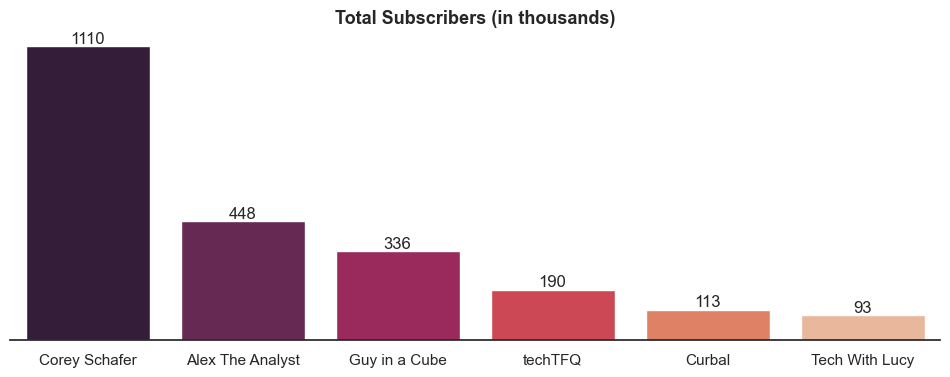

In [11]:
sns.set(rc = {'figure.figsize': (12, 4)})
sns.set_style(style = 'white') 
ax = sns.barplot(x = 'Channel', 
                 y = 'Subscribers', 
                 data = df_stats, 
                 order = df_stats.sort_values('Subscribers', ascending = False)['Channel'],
                 palette = 'rocket')
ax.set_title('Total Subscribers (in thousands)', weight = 'semibold').set_fontsize('13')
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_yticks([])
ax.grid(False)
sns.despine(left = True, bottom = False)
for i in ax.containers:
    ax.bar_label(i)

---

Visualising the number of <b>Videos</b> for all the channels:

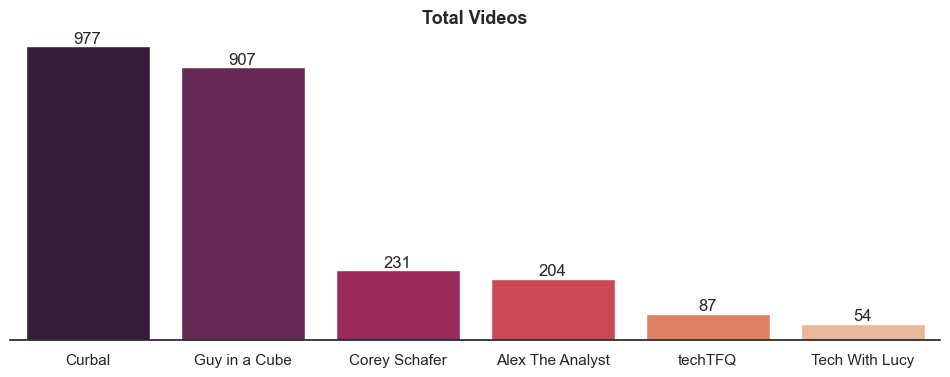

In [12]:
sns.set(rc = {'figure.figsize': (12, 4)})
sns.set_style(style = 'white') 
ax = sns.barplot(x = 'Channel', 
                 y = 'Videos', 
                 data = df_stats, 
                 order = df_stats.sort_values('Videos', ascending = False)['Channel'],
                 palette = 'rocket')
ax.set_title('Total Videos', weight = 'semibold').set_fontsize('13')
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_yticks([])
ax.grid(False)
sns.despine(left = True, bottom = False)
for i in ax.containers:
    ax.bar_label(i)

---

Comparing <b>Subscribers</b> and <b>Views</b>

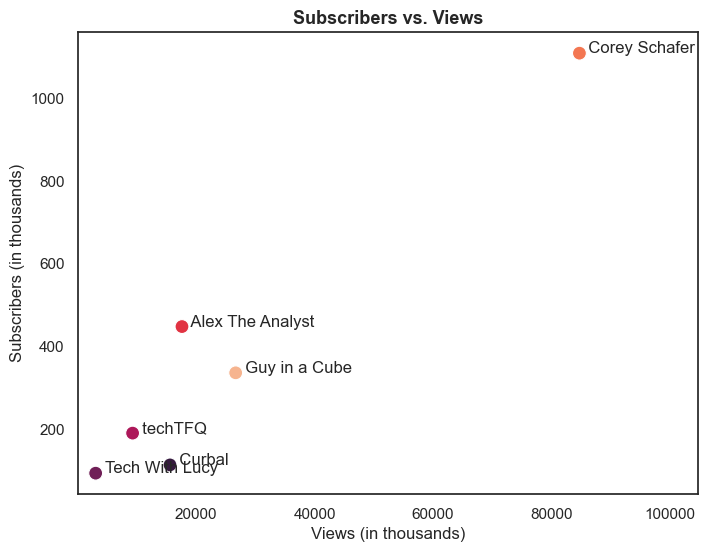

In [13]:
sns.set(rc = {'figure.figsize': (8, 6)})
sns.set_style(style = 'white') 
ax = sns.scatterplot(data = df_stats, x = "Views", y = "Subscribers", hue = 'Channel', s = 100, legend = False, palette = 'rocket')
ax.set_title('Subscribers vs. Views', weight = 'semibold').set_fontsize('13')
ax.set_xlabel('Views (in thousands)')
ax.set_ylabel('Subscribers (in thousands)')

# Formatting the chart to include the names of the channels as annotations
for i, txt in enumerate(df_stats['Channel']):
    ax.annotate('  ' + txt, (df_stats['Views'][i], df_stats['Subscribers'][i]))

plt.xlim((1, df_stats['Views'].max() + 20000))

plt.show()

---

Comparing __Videos__ and __Views__

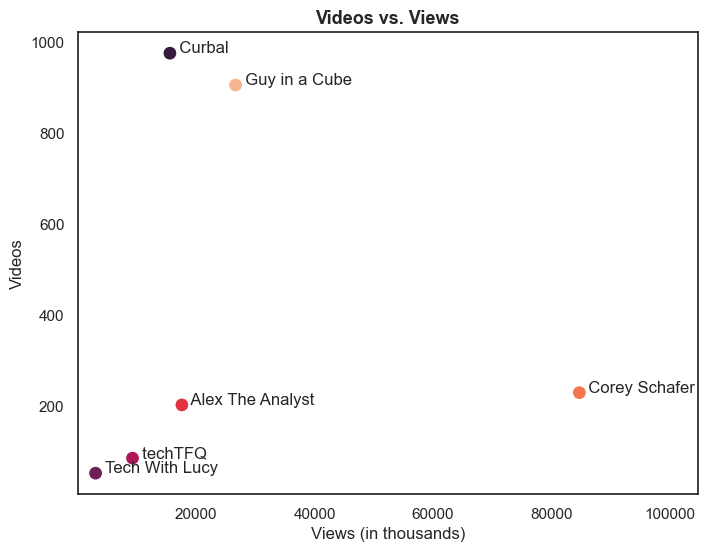

In [14]:
sns.set(rc = {'figure.figsize': (8, 6)})
sns.set_style(style = 'white') 
ax = sns.scatterplot(data = df_stats, x = "Views", y = "Videos", hue = 'Channel', s = 100, legend = False, palette = 'rocket')
ax.set_title('Videos vs. Views', weight = 'semibold').set_fontsize('13')
ax.set_xlabel('Views (in thousands)')

# Formatting the chart to include the names of the channels as annotations
for i, txt in enumerate(df_stats['Channel']):
    ax.annotate('  ' + txt, (df_stats['Views'][i], df_stats['Videos'][i]))

plt.xlim((1, df_stats['Views'].max() + 20000))
plt.show()

---

It seems that __Subscribers__ and __Views__ have a __positive__ correlation. Let's visualise it:

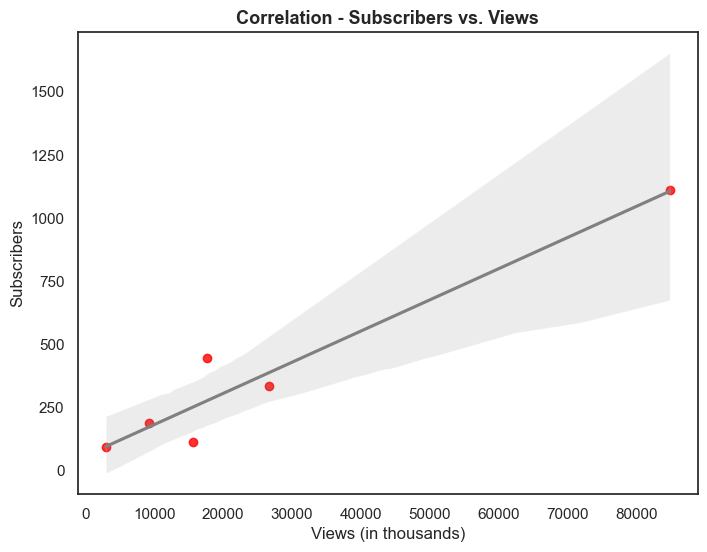

In [15]:
# Plotting the correlation between Subscribers and Views
ax = sns.regplot(x = 'Views', y = 'Subscribers', data = df_stats, scatter_kws = {'color':'red'}, line_kws = {'color':'grey'})
ax.set_xlabel('Views (in thousands)')
ax.set_title('Correlation - Subscribers vs. Views', weight = 'semibold').set_fontsize('13')


In fact, __Subscribers__ and __Views__ are the only metrics __positively correlated__, which means that they tend to move in the same direction (i.e. the number of Views tend to be higher as the number of Subscribers grows).

The remaining metrics, on the other hand, have negative correlations, as shown in the following Correlation Matrix. This means that these metrics tend to move in opposite directions in the case of these selected channels.

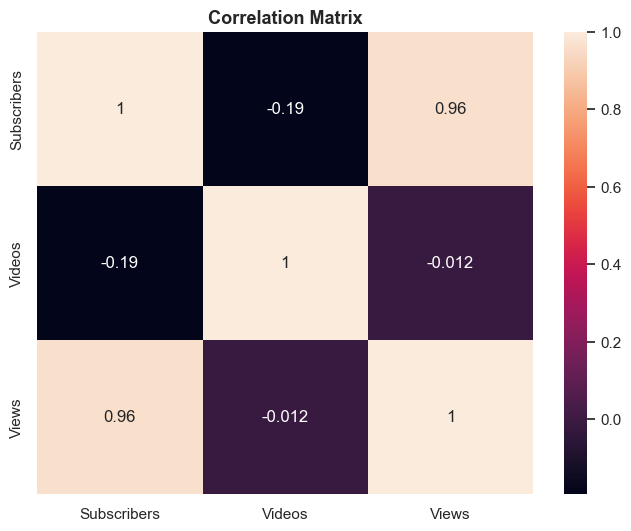

In [16]:
# Generating a correlation matrix
ax = sns.heatmap(df_stats[['Subscribers', 'Videos', 'Views']].corr(), annot= True)
ax.set_title('Correlation Matrix', weight = 'semibold').set_fontsize('13')


---

### Analysing individual videos

Let's get some more data from YouTube to take a closer look at the __videos__ from these channels:

In [17]:
# Getting the playlist ids from the dataframe used previously
playlists = df_stats['PlaylistIds']
playlists


0    UUJ7UhloHSA4wAqPzyi6TOkw
1    UUck1m7zZdzioiUzqhzpdNPw
2    UUnz-ZXXER4jOvuED5trXfEA
3    UU7cs8q-gJRlGwj4A8OmCmXg
4    UUCezIgC97PvUuR4_gbFUs5g
5    UUFp1vaKzpfvoGai0vE5VJ0w
Name: PlaylistIds, dtype: object

In [18]:
# Creating a function to get the videos ids for each channel
def getVideoIds(playlist_ids):
    
    # Creating a list that will host the results returned by the API
    all_video_ids = list()
    
    for playlist in playlist_ids:
        # Getting data from the first page of results
        # The default number of items returned is 5 (setting it to the maximum value allowed: 50)
        request = youtube.playlistItems().list(
                    part = 'snippet,contentDetails',
                    playlistId = playlist,
                    maxResults = 50)   
        response = request.execute()

        # Specifying the actual data that will be extracted 
        for i in range(0,len(response['items'])):
            all_video_ids.append(response['items'][i]['snippet']['resourceId']['videoId'])


        # Handling pagination
        next_page_token = response.get('nextPageToken')
        next_page = True

        while next_page:
            if next_page_token == None:
                next_page = False
            else:
                request = youtube.playlistItems().list(
                    part = 'snippet,contentDetails',
                    playlistId = playlist,
                    maxResults = 50,
                    pageToken = next_page_token)  # <-- If there are more pages, the parameter 'pageToken' is required
                response = request.execute()

                for i in range(0,len(response['items'])):
                    all_video_ids.append(response['items'][i]['snippet']['resourceId']['videoId'])
            # Updating the 'next_page_token' variable as it loops through the pages
            next_page_token = response.get('nextPageToken')  
        
    return all_video_ids
      

In [19]:
# Saving the results returned by the function above (all video ids) in a variable
videos = getVideoIds(playlists)
videos


['aRMZEfcQrdY',
 'ROyVkQ9vTjc',
 'McVvOY_5Bsk',
 'ibu03f3qguI',
 'akl_Qej3nIA',
 'WWZeycd68dA',
 'QBVzixsT9p4',
 'KIc7yfXEpL8',
 'jawIWz1_Mz4',
 'U7cFtZJeUaw',
 'ZuoMjwc10mM',
 'aQV1v6HI7go',
 'HH3GZdq_eQY',
 'boVPPe0lwbM',
 'sPqQuKbyDwM',
 'KHAyCQad3vw',
 'hMn7I2c-Cy0',
 'Fc91JR_1suw',
 'iS8AAV4CS8I',
 'xiz_4lfYS2c',
 '3bXLNc4vE48',
 'HEEACbnOacs',
 'HN6qsUXKZ2I',
 'Rg6N1JpWnz0',
 'tSREqpagte4',
 'mupGW-NW140',
 'Yl98RZHY8dc',
 '2Qa0XEqRzYU',
 '2FDNQ5w1tDY',
 '-L6ZHnfxQ1s',
 'KWTLqS02g4o',
 'P_OSQDusWKY',
 'TZEueZc3hk8',
 'mXmg9fHxgEw',
 'AWcdk5uoxeg',
 '4X6nOPM_uCw',
 'WITBnwAQZaQ',
 'qD5VVN4Bgb0',
 'yLtxa0dgtQs',
 'ujQ5lZ0OjnE',
 'uv1ko7CjFio',
 'hG27iTTZ6tY',
 'wZDiMnUuyf4',
 'rmR5IjJLFAk',
 'LA5F7T-4_ww',
 '_n_G5MeL48I',
 'OGqoUGCmqj4',
 'mnTAncnNc84',
 'ZgqnPYmEcXw',
 'biQ2XhX4wXY',
 'F873tJW1lPg',
 'BG51W2lKYIA',
 'iteQunsuU-M',
 'Th_D4PKvjOw',
 '9TT2sn8V6xI',
 '_JB3qEBNL8w',
 'FThnAmHyCW0',
 'hRbmFj-W4wI',
 '40A2eKoK5S4',
 'rnC9gy8LIbM',
 'IfDINqo2REQ',
 'h19t90YI0bI',
 'wiczD-

In [20]:
# Creating a function to pull details from each video
def getVideoData(video_ids):
    
    # Creating a dictionary and a list that will host the results returned by the API
    data = dict()
    all_videos = list()

    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
                        part = 'snippet,contentDetails,statistics',
                        id = ','.join(video_ids[i:i+50]),
                        maxResults = 50)
        response = request.execute()  
        
        for video in response['items']:
            
            data['Channel_name'] = video['snippet']['channelTitle']
            data['Channel_id'] = video['snippet']['channelId']
            data['Video_title'] = video['snippet']['title']
            data['Video_id'] = video_ids[i]
            data['Video_duration'] = video['contentDetails']['duration']
            data['Video_publication'] = video['snippet']['publishedAt']
            data['Video_views'] = video['statistics']['viewCount']
            data['Video_likes'] = video['statistics'].get('likeCount')
            data['Video_comments'] = video['statistics']['commentCount']
            data['Video_tags'] = video['snippet'].get('tags')
            
            all_videos.append(data.copy())
        
    return all_videos


---

Preparing the __videos__ data for analysis:

In [21]:
# Creating a dataframe based on the videos details data
df_videos_stats = pd.DataFrame(getVideoData(videos))
df_videos_stats.head()


,Channel_name,Channel_id,Video_title,Video_id,Video_duration,Video_publication,Video_views,Video_likes,Video_comments,Video_tags
0,Curbal,UCJ7UhloHSA4wAqPzyi6TOkw,More Dynamic formatting AWESOMENESS!! | Annota...,aRMZEfcQrdY,PT4M45S,2023-04-19T14:00:00Z,2957,145,24,"[Power bi, powerbi, Curbal, power bi desktop, ..."
1,Curbal,UCJ7UhloHSA4wAqPzyi6TOkw,Show numbers in Thousands or Millions in same ...,aRMZEfcQrdY,PT1M58S,2023-04-17T12:00:13Z,8214,233,37,"[Power bi, powerbi, Curbal, power bi desktop, ..."
2,Curbal,UCJ7UhloHSA4wAqPzyi6TOkw,"Bite Solution 16: Add, edit and delete record...",aRMZEfcQrdY,PT7M59S,2023-04-14T13:22:21Z,301,9,0,"[Power bi, powerbi, Curbal, power bi desktop, ..."
3,Curbal,UCJ7UhloHSA4wAqPzyi6TOkw,"Bite 16: Add, edit and delete records on SQLit...",aRMZEfcQrdY,PT12M14S,2023-04-14T13:22:15Z,242,6,0,"[Power bi, powerbi, Curbal, power bi desktop, ..."
4,Curbal,UCJ7UhloHSA4wAqPzyi6TOkw,Bite Solution 15: Dynamic query a SQL database...,aRMZEfcQrdY,PT17M10S,2023-04-14T13:21:59Z,378,5,4,"[Curbal, ruth pozuelo, bite 15 solution python..."


In [22]:
# Checking the data types of all columns 
df_videos_stats.dtypes


Channel_name         object
Channel_id           object
Video_title          object
Video_id             object
Video_duration       object
Video_publication    object
Video_views          object
Video_likes          object
Video_comments       object
Video_tags           object
dtype: object

In [23]:
# Dropping NaN
df_videos_stats.dropna(inplace = True)


In [24]:
# Video duration is currently stored as string, in ISO 8601 format
df_videos_stats['Video_duration'].apply(type)


0       <class 'str'>
1       <class 'str'>
2       <class 'str'>
3       <class 'str'>
4       <class 'str'>
            ...      
2451    <class 'str'>
2452    <class 'str'>
2453    <class 'str'>
2454    <class 'str'>
2455    <class 'str'>
Name: Video_duration, Length: 2436, dtype: object

In [25]:
# Converting video duration to seconds
df_videos_stats['Video_duration'] = pd.to_timedelta(df_videos_stats['Video_duration']).dt.total_seconds()


In [26]:
# Changing the format of the 'Video_publication' from string to date
df_videos_stats['Video_publication'] = pd.to_datetime(df_videos_stats['Video_publication']).dt.date


In [27]:
# Converting the columns 'Video_views', 'Video_likes', and 'Video_comments' to numeric
df_videos_stats['Video_views'] = df_videos_stats['Video_views'].astype(int)
df_videos_stats['Video_likes'] = df_videos_stats['Video_likes'].astype(pd.Int64Dtype())
df_videos_stats['Video_comments'] = df_videos_stats['Video_comments'].astype(int)
df_videos_stats.head(3)


,Channel_name,Channel_id,Video_title,Video_id,Video_duration,Video_publication,Video_views,Video_likes,Video_comments,Video_tags
0,Curbal,UCJ7UhloHSA4wAqPzyi6TOkw,More Dynamic formatting AWESOMENESS!! | Annota...,aRMZEfcQrdY,285.0,2023-04-19,2957,145,24,"[Power bi, powerbi, Curbal, power bi desktop, ..."
1,Curbal,UCJ7UhloHSA4wAqPzyi6TOkw,Show numbers in Thousands or Millions in same ...,aRMZEfcQrdY,118.0,2023-04-17,8214,233,37,"[Power bi, powerbi, Curbal, power bi desktop, ..."
2,Curbal,UCJ7UhloHSA4wAqPzyi6TOkw,"Bite Solution 16: Add, edit and delete record...",aRMZEfcQrdY,479.0,2023-04-14,301,9,0,"[Power bi, powerbi, Curbal, power bi desktop, ..."


---

Visualising the top performing __videos__ from each channel based on number of:
- __Views__
- __Likes__
- __Comments__

In [47]:
# Creating a subset of the data, which contains the top 10 videos from each channel
# Based on views and likes
videos_views = df_videos_stats.groupby(['Channel_name']).apply(lambda x: x.sort_values(['Channel_name', 'Video_views'], ascending = False)).reset_index(drop = True)
videos_likes = df_videos_stats.groupby(['Channel_name']).apply(lambda x: x.sort_values(['Channel_name', 'Video_likes'], ascending = False)).reset_index(drop = True)
videos_comments = df_videos_stats.groupby(['Channel_name']).apply(lambda x: x.sort_values(['Channel_name', 'Video_comments'], ascending = False)).reset_index(drop = True)
videos_duration = df_videos_stats.groupby(['Channel_name']).apply(lambda x: x.sort_values(['Channel_name', 'Video_duration'], ascending = False)).reset_index(drop = True)

top10_videos_views = videos_views.groupby(['Channel_name']).head(10)
top10_videos_likes = videos_likes.groupby(['Channel_name']).head(10)
top10_videos_comments = videos_comments.groupby(['Channel_name']).head(10)
top10_videos_duration = videos_duration.groupby(['Channel_name']).head(10)


Views

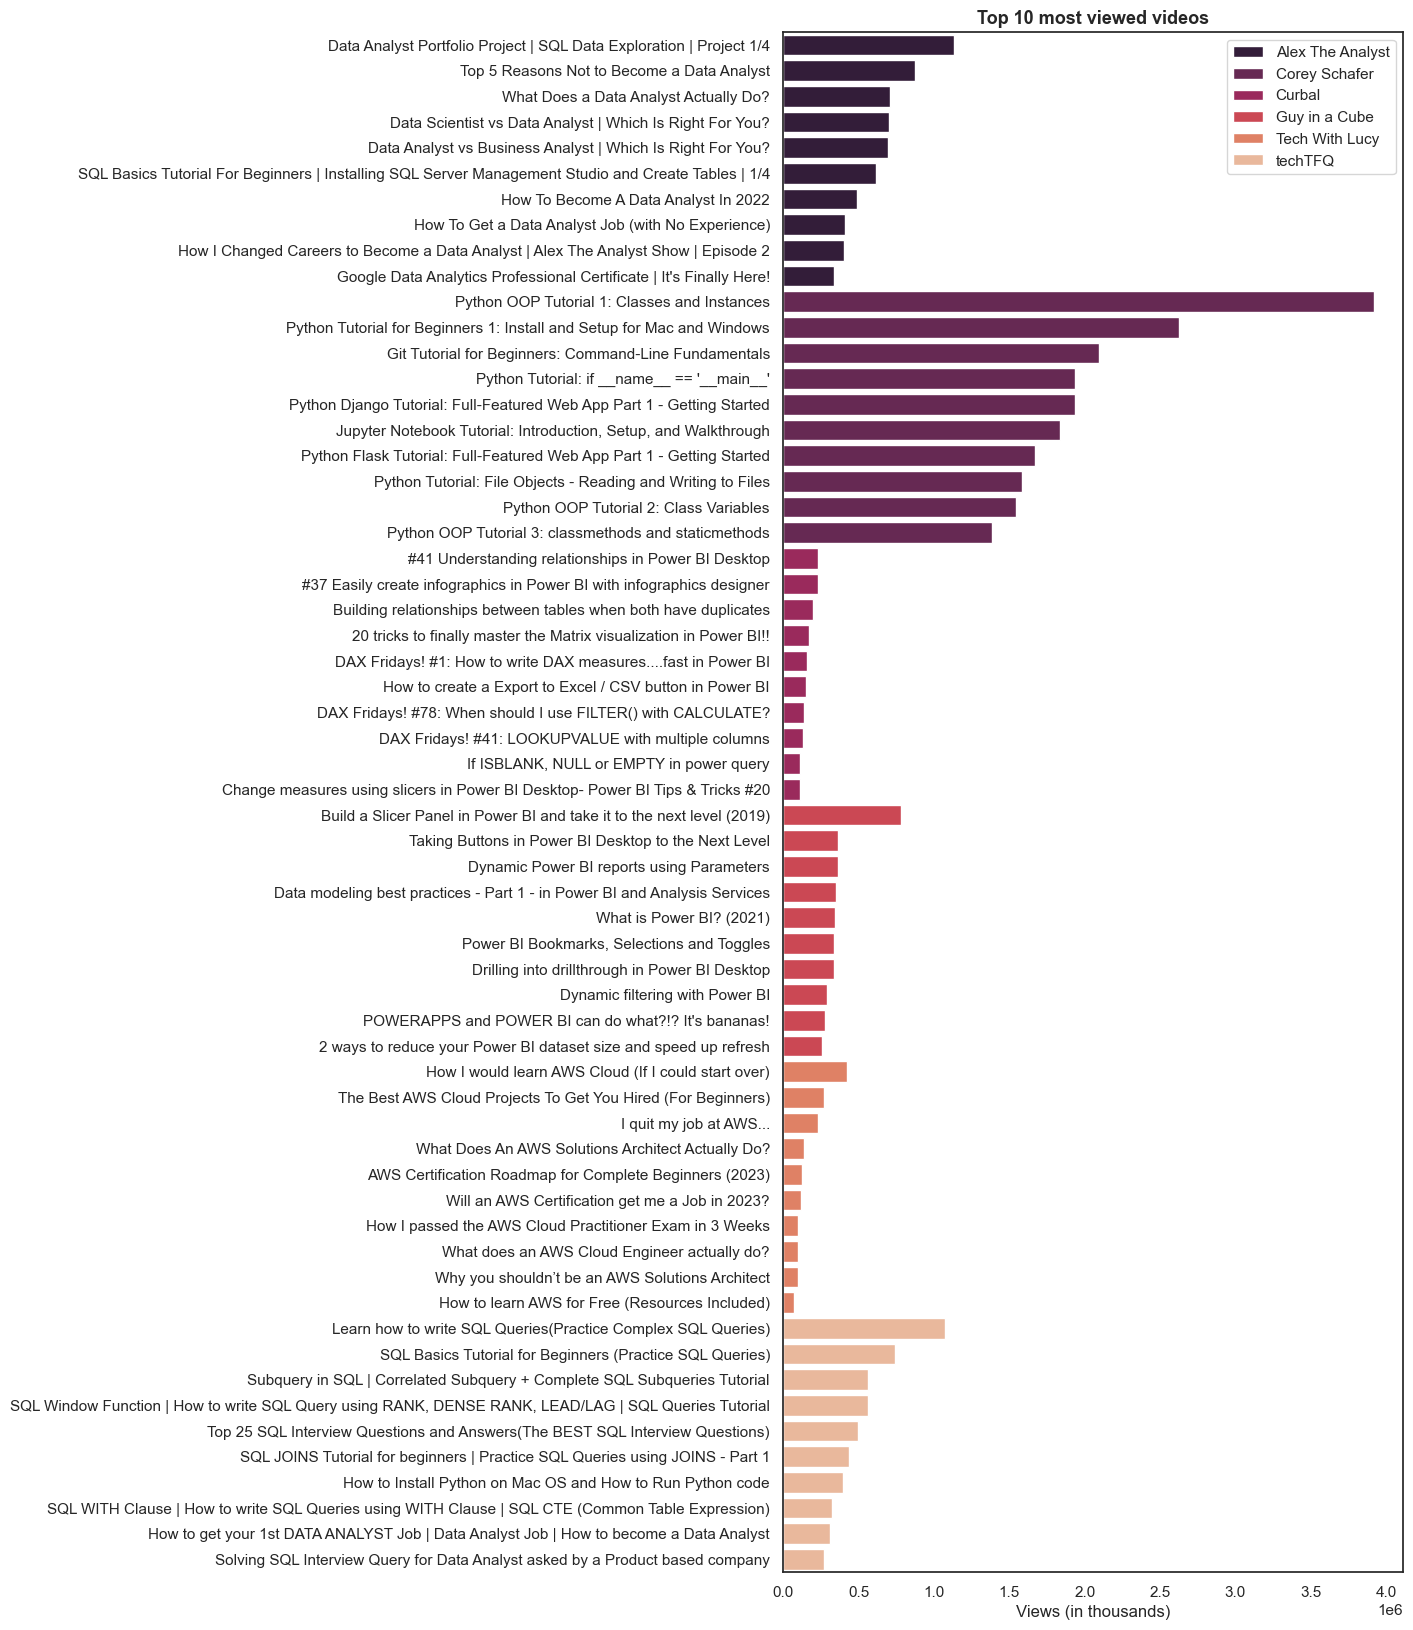

In [46]:
# Plotting the top 10 videos of each channel based on their number of views
sns.set(rc = {'figure.figsize': (8, 20)})
sns.set_style(style = 'white') 
ax = sns.barplot(x = 'Video_views', 
                 y = 'Video_title', 
                 hue = 'Channel_name', 
                 data = top10_videos_views, 
                 palette = 'rocket', 
                 dodge = False)
ax.set_title('Top 10 most viewed videos', weight = 'semibold').set_fontsize('13')
ax.set_xlabel('Views (in thousands)')
ax.set_ylabel(None)
ax.legend().set_title(None)
plt.show()


Likes

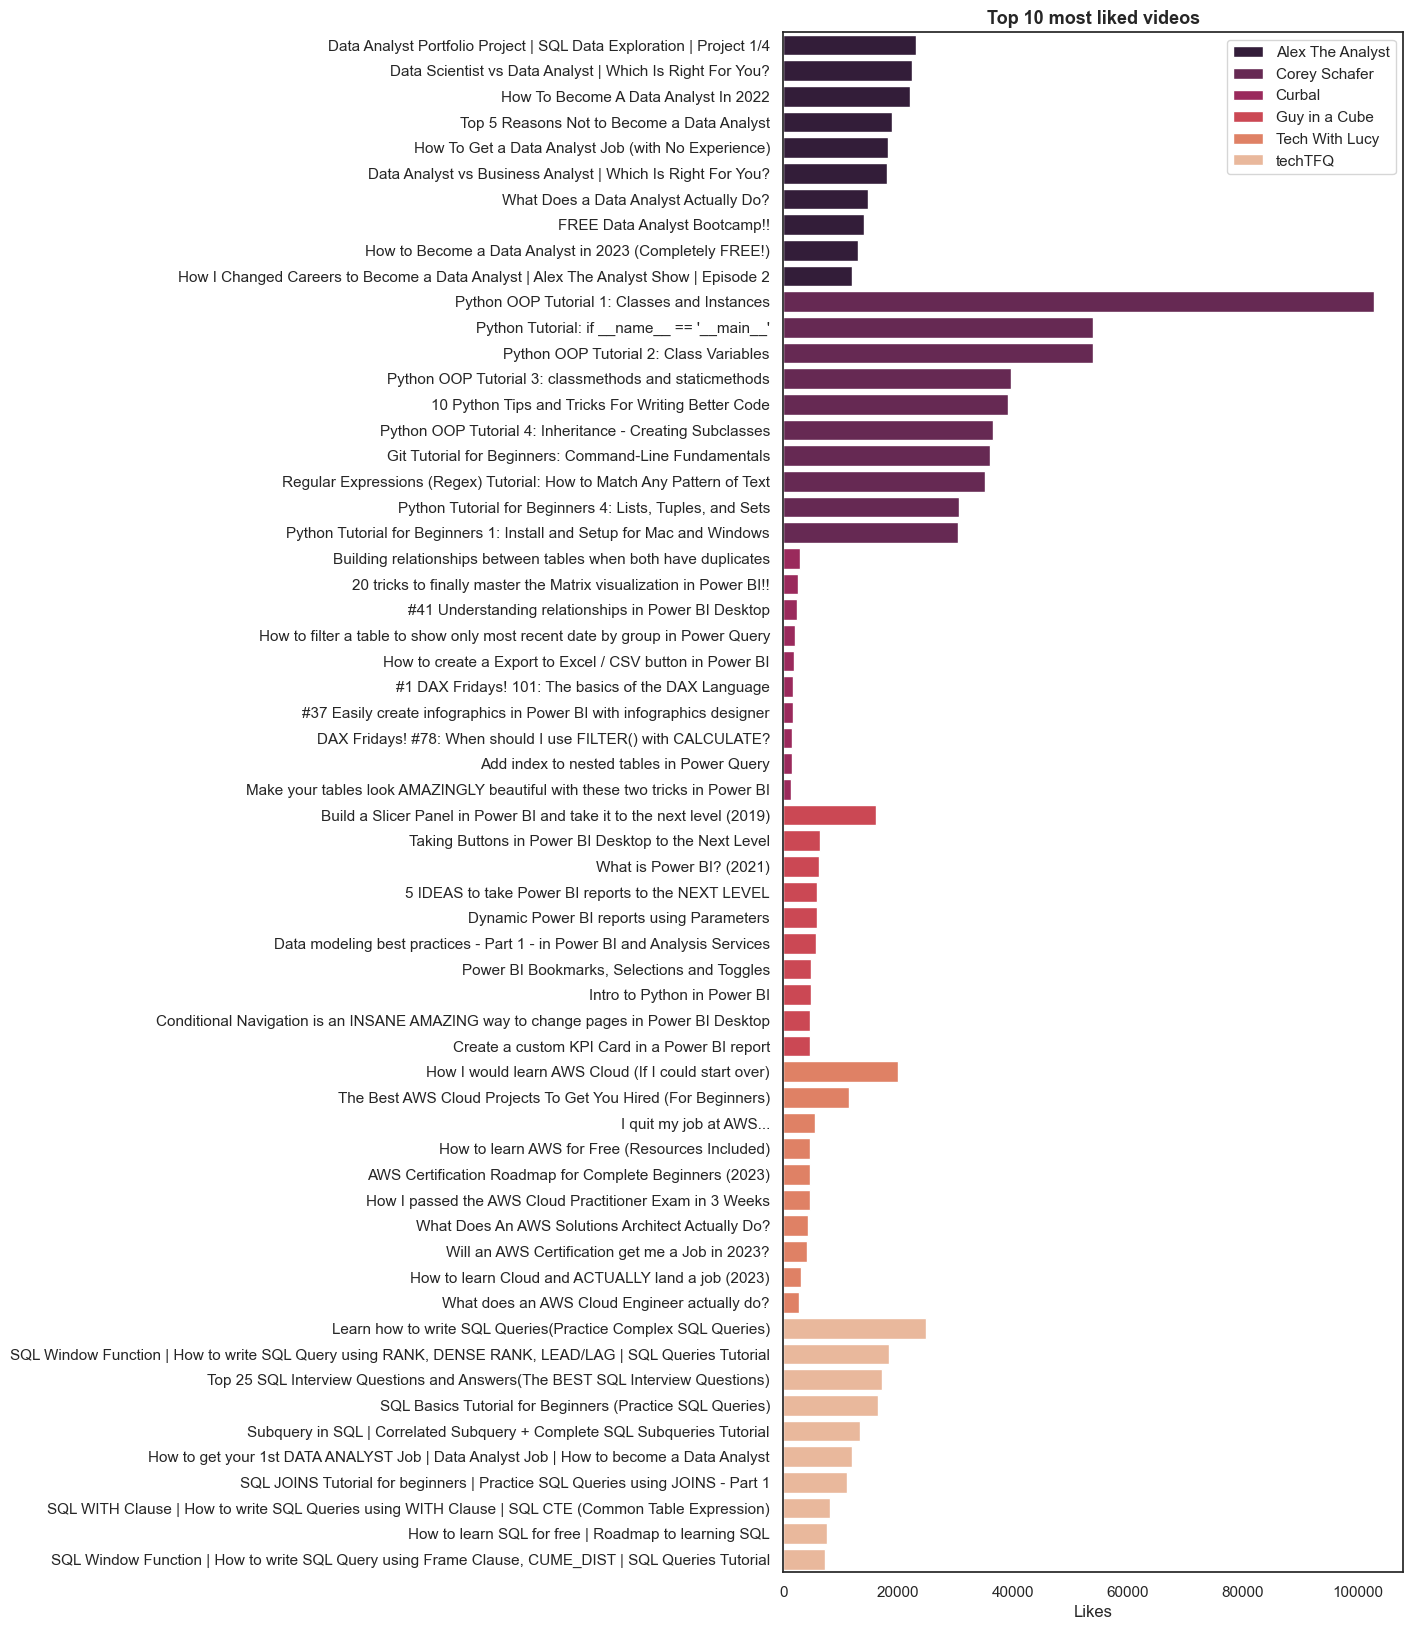

In [45]:
# Plotting the top 10 videos of each channel based on their number of likes
top10_videos_likes['Video_likes'] = top10_videos_likes['Video_likes'].astype(int)

sns.set(rc = {'figure.figsize': (8, 20)})
sns.set_style(style = 'white') 
ax = sns.barplot(x = 'Video_likes', 
                 y = 'Video_title', 
                 hue = 'Channel_name', 
                 data = top10_videos_likes, 
                 palette = 'rocket', 
                 dodge = False)
ax.set_title('Top 10 most liked videos', weight = 'semibold').set_fontsize('13')
ax.set_xlabel('Likes')
ax.set_ylabel(None)
ax.legend().set_title(None)
plt.show()


Comments

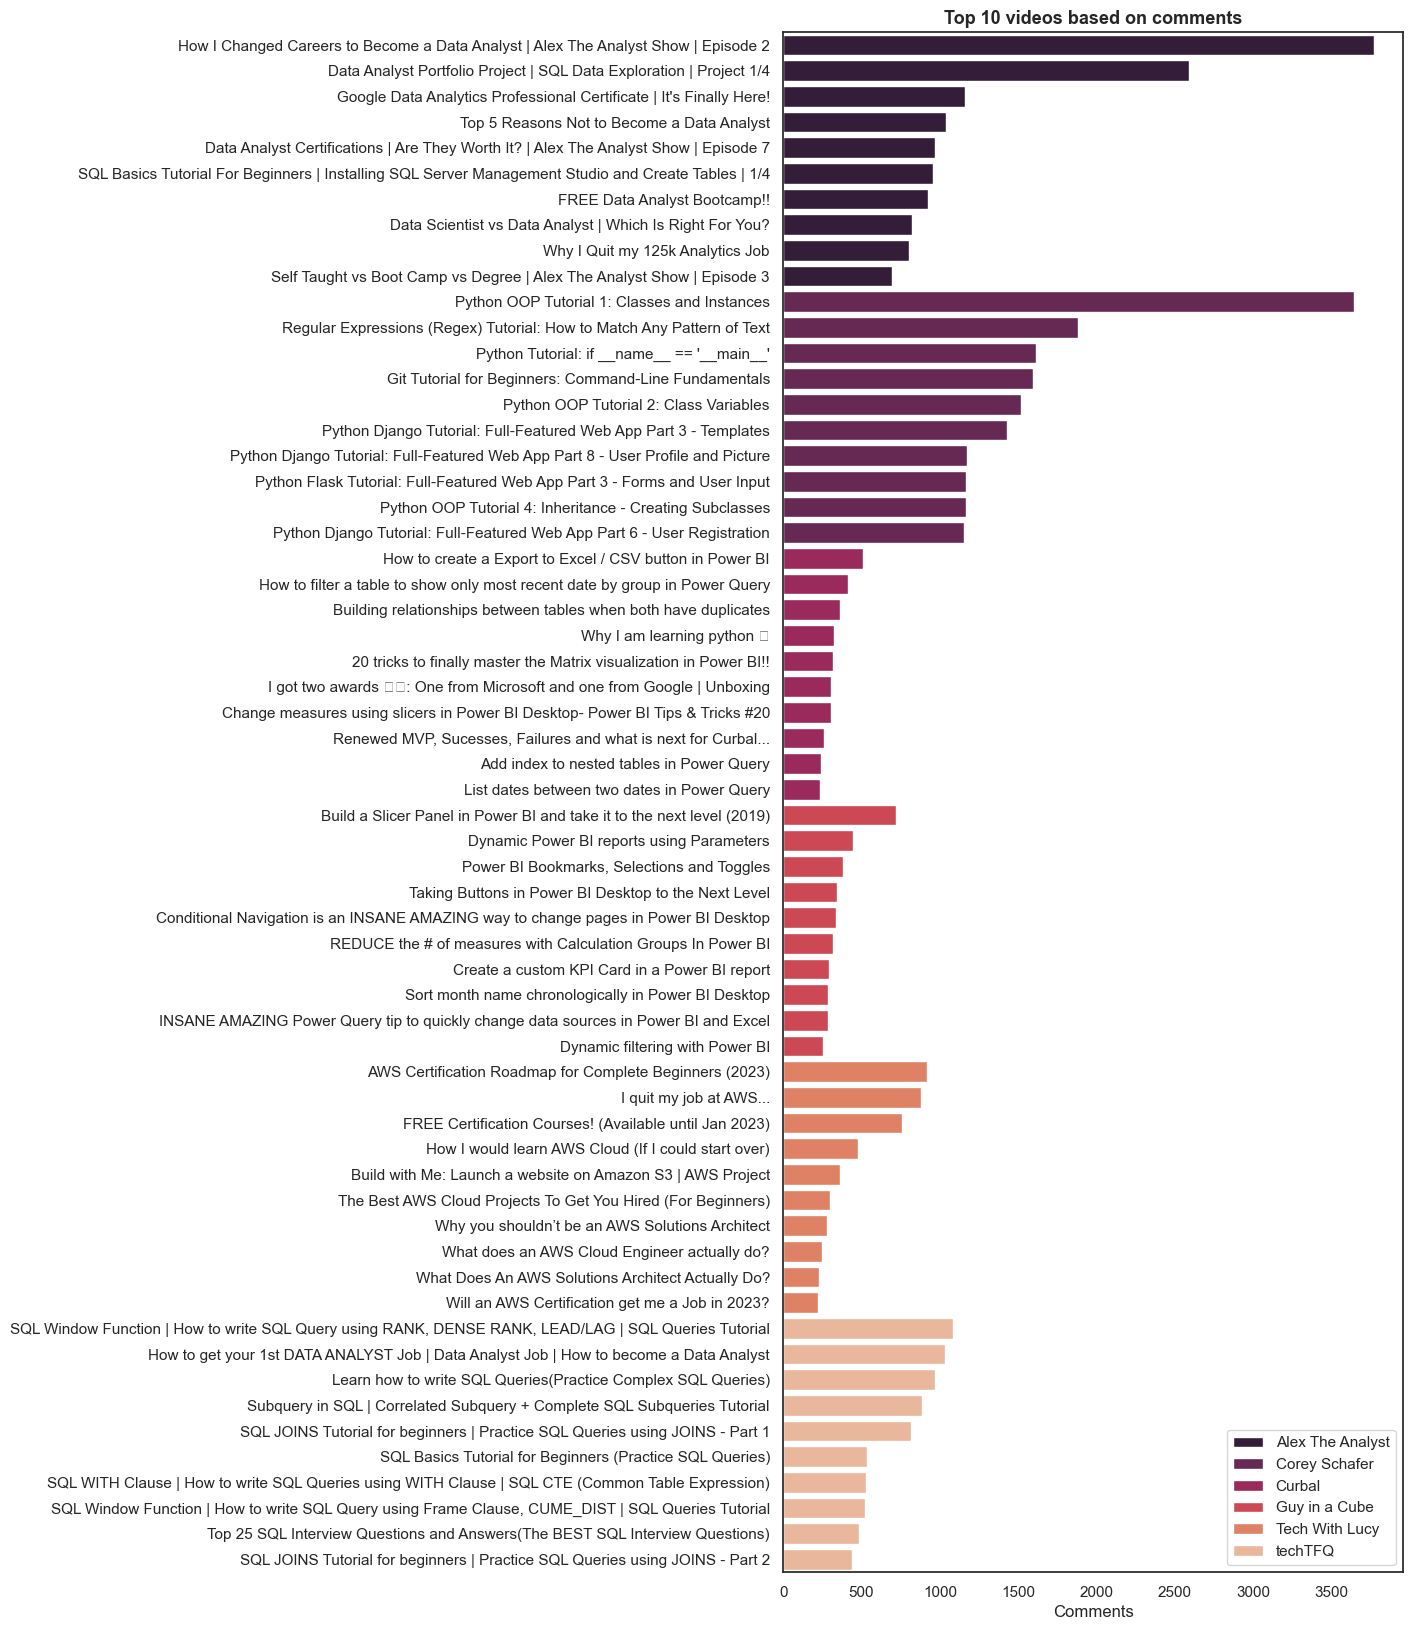

In [44]:
# Plotting the top 10 videos of each channel based on their number of comments
sns.set(rc = {'figure.figsize': (8, 20)})
sns.set_style(style = 'white') 
ax = sns.barplot(x = 'Video_comments', 
                 y = 'Video_title', 
                 hue = 'Channel_name', 
                 data = top10_videos_comments, 
                 palette = 'rocket', 
                 dodge = False)
ax.set_title('Top 10 videos based on comments', weight = 'semibold').set_fontsize('13')
ax.set_xlabel('Comments')
ax.set_ylabel(None)
ax.legend().set_title(None)
plt.show()


Video duration

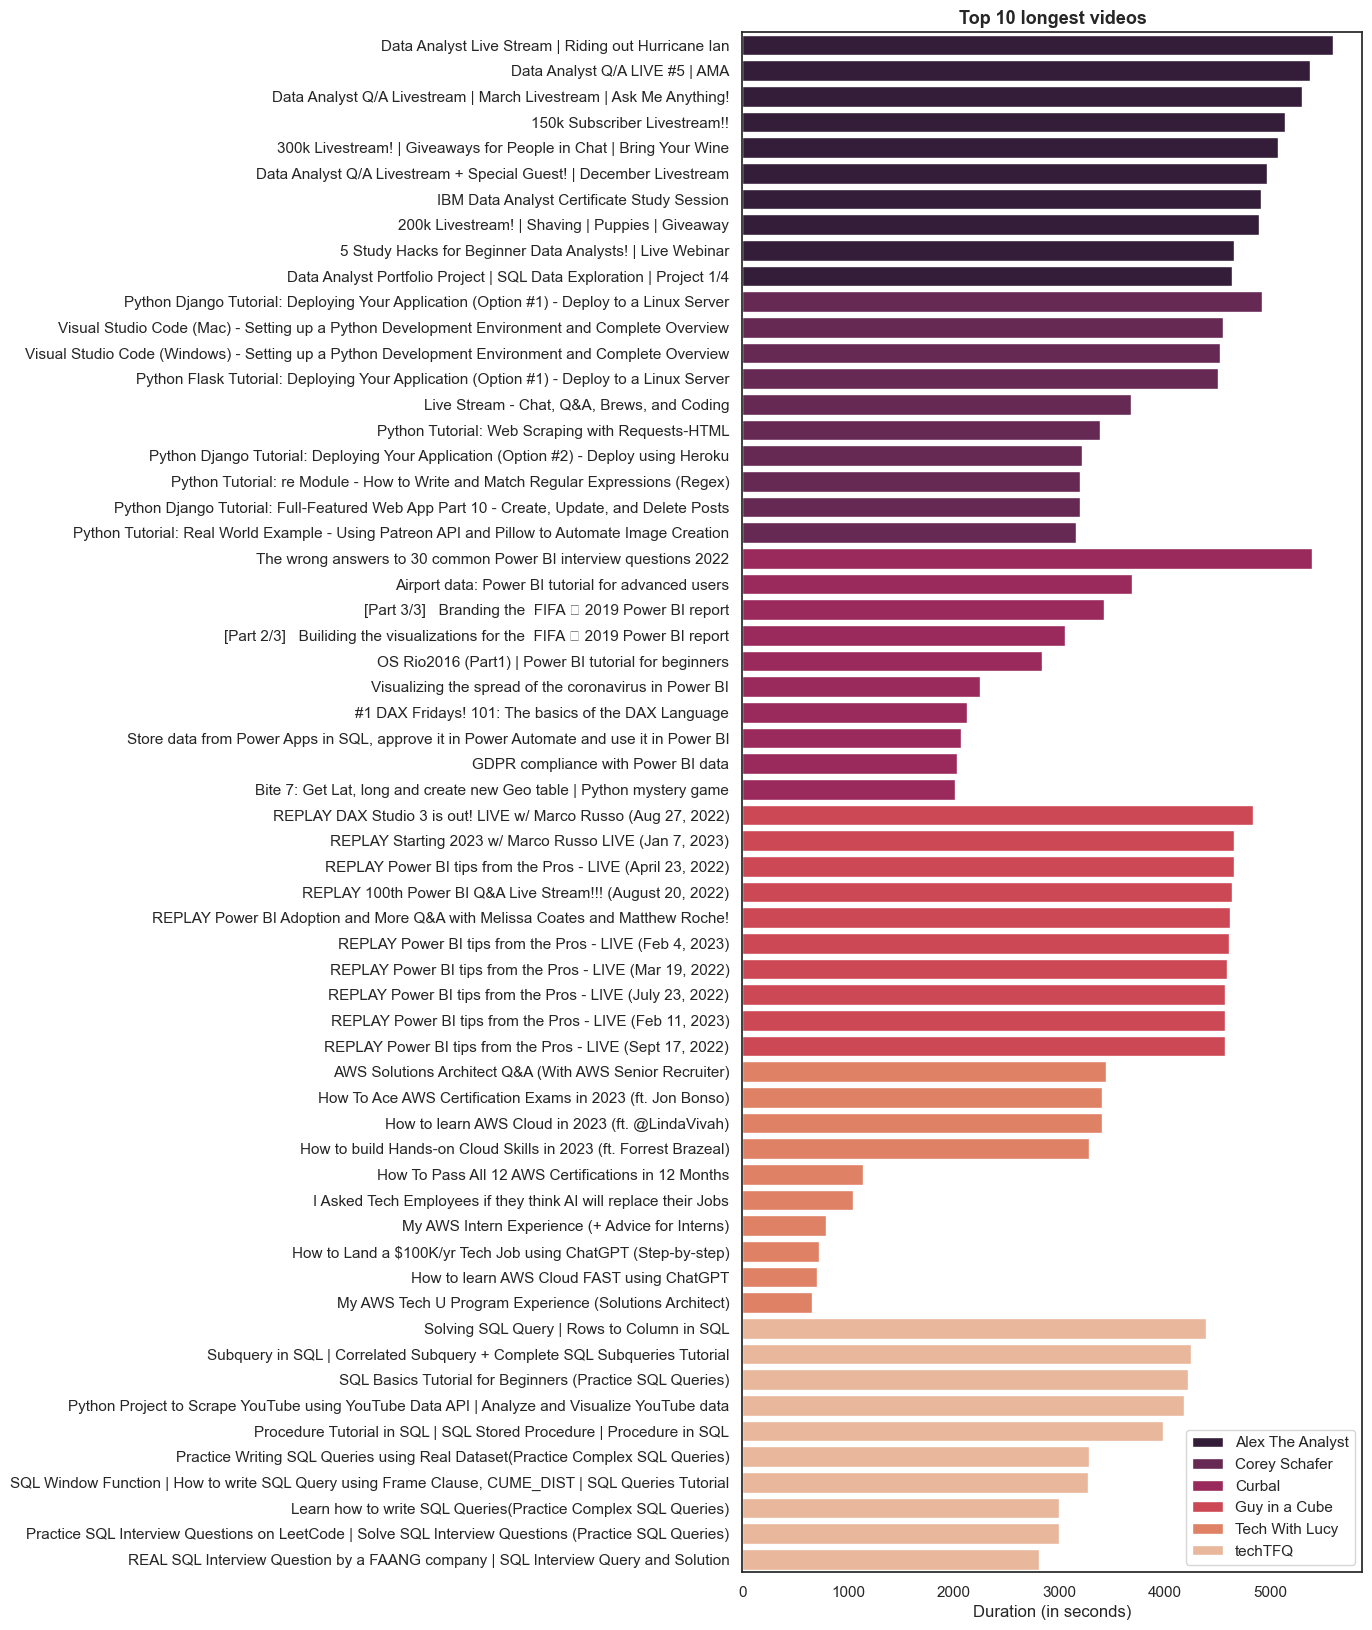

In [43]:
# Plotting the top 10 videos of each channel based on their duration
sns.set(rc = {'figure.figsize': (8, 20)})
sns.set_style(style = 'white') 
ax = sns.barplot(x = 'Video_duration', y = 'Video_title', hue = 'Channel_name', data = top10_videos_duration, palette = 'rocket', dodge = False)
ax.set_title('Top 10 longest videos', weight = 'semibold').set_fontsize('13')
ax.set_xlabel('Duration (in seconds)')
ax.set_ylabel(None)
ax.legend().set_title(None)
plt.show()


---

Now, let's understand the averages at channel level (considering all videos):
- Views
- Likes 
- Comments
- Videos duration

In [33]:
# Calculating averages at the channels level
df_videos_avg = df_videos_stats[['Channel_name', 'Video_views', 'Video_likes', 'Video_comments', 'Video_duration']].groupby('Channel_name', as_index = False).mean()
df_videos_avg


,Channel_name,Video_views,Video_likes,Video_comments,Video_duration
0,Alex The Analyst,86699.980296,2552.773399,194.729064,1275.000000
1,Corey Schafer,366821.740260,8003.212121,357.134199,1231.458874
2,Curbal,16010.563786,248.270576,50.518519,569.253086
3,Guy in a Cube,29651.107023,545.09476,42.373467,596.079153
4,Tech With Lucy,55793.872340,2159.170213,167.297872,703.680851
5,techTFQ,107613.511628,2940.209302,189.046512,1478.162791


In [34]:
# Renaming the dataframe columns accordingly (avg)
df_videos_avg.rename(columns = {'Video_views': 'Video_views_avg', 
                                'Video_likes': 'Video_likes_avg',
                                'Video_comments': 'Video_comments_avg',
                                'Video_duration': 'Video_duration_avg'}, 
                                inplace = True)
df_videos_avg

,Channel_name,Video_views_avg,Video_likes_avg,Video_comments_avg,Video_duration_avg
0,Alex The Analyst,86699.980296,2552.773399,194.729064,1275.000000
1,Corey Schafer,366821.740260,8003.212121,357.134199,1231.458874
2,Curbal,16010.563786,248.270576,50.518519,569.253086
3,Guy in a Cube,29651.107023,545.09476,42.373467,596.079153
4,Tech With Lucy,55793.872340,2159.170213,167.297872,703.680851
5,techTFQ,107613.511628,2940.209302,189.046512,1478.162791


Average __views__

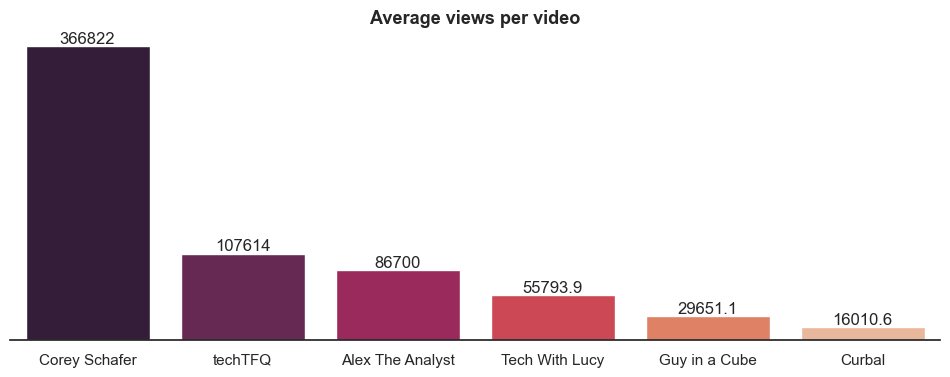

In [35]:
# Visualising the average views per channel
sns.set(rc = {'figure.figsize': (12, 4)})
sns.set_style(style = 'white') 
ax = sns.barplot(x = 'Channel_name', 
                 y = 'Video_views_avg', 
                 data = df_videos_avg, 
                 order = df_videos_avg.sort_values('Video_views_avg', ascending = False)['Channel_name'],
                 palette = 'rocket')
ax.set_title('Average views per video', weight = 'semibold').set_fontsize('13')
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_yticks([])
ax.grid(False)
sns.despine(left = True, bottom = False)
for i in ax.containers:
    ax.bar_label(i)


Average __likes__

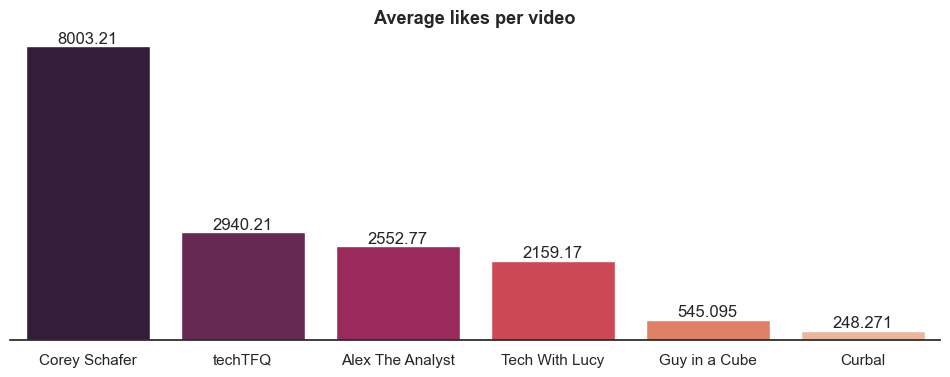

In [36]:
# Visualising the average likes per channel
sns.set(rc = {'figure.figsize': (12, 4)})
sns.set_style(style = 'white') 
ax = sns.barplot(x = 'Channel_name', 
                 y = 'Video_likes_avg', 
                 data = df_videos_avg, 
                 order = df_videos_avg.sort_values('Video_likes_avg', ascending = False)['Channel_name'],
                 palette = 'rocket')
ax.set_title('Average likes per video', weight = 'semibold').set_fontsize('13')
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_yticks([])
ax.grid(False)
sns.despine(left = True, bottom = False)
for i in ax.containers:
    ax.bar_label(i)


Average __comments__

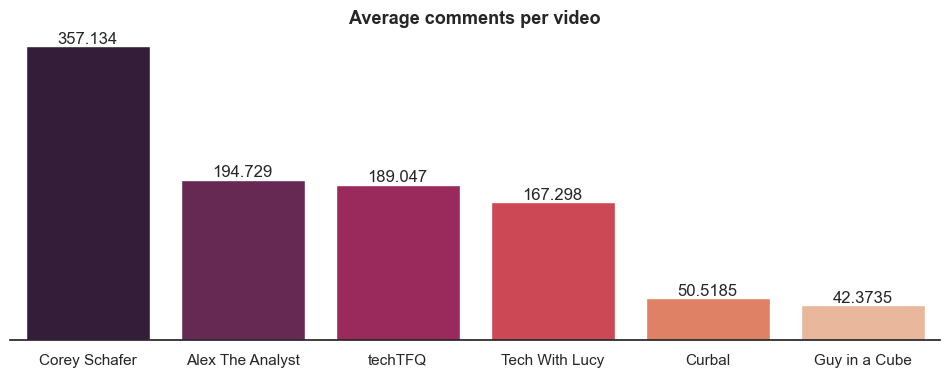

In [37]:
# Visualising the average comments per channel
sns.set(rc = {'figure.figsize': (12, 4)})
sns.set_style(style = 'white') 
ax = sns.barplot(x = 'Channel_name', 
                 y = 'Video_comments_avg', 
                 data = df_videos_avg, 
                 order = df_videos_avg.sort_values('Video_comments_avg', ascending = False)['Channel_name'],
                 palette = 'rocket')
ax.set_title('Average comments per video', weight = 'semibold').set_fontsize('13')
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_yticks([])
ax.grid(False)
sns.despine(left = True, bottom = False)
for i in ax.containers:
    ax.bar_label(i)


Average __video duration__

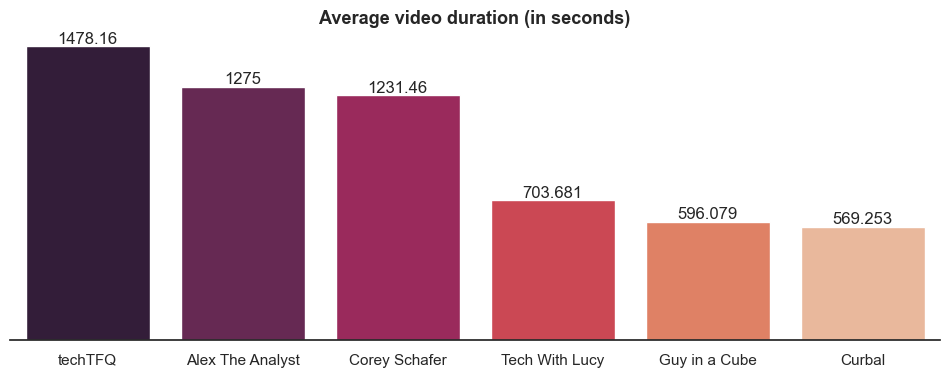

In [38]:
# Visualising the average video duration per channel
sns.set(rc = {'figure.figsize': (12, 4)})
sns.set_style(style = 'white') 
ax = sns.barplot(x = 'Channel_name', 
                 y = 'Video_duration_avg', 
                 data = df_videos_avg, 
                 order = df_videos_avg.sort_values('Video_duration_avg', ascending = False)['Channel_name'],
                 palette = 'rocket')
ax.set_title('Average video duration (in seconds)', weight = 'semibold').set_fontsize('13')
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_yticks([])
ax.grid(False)
sns.despine(left = True, bottom = False)
for i in ax.containers:
    ax.bar_label(i)


---

Understanding the correlations in the videos average data

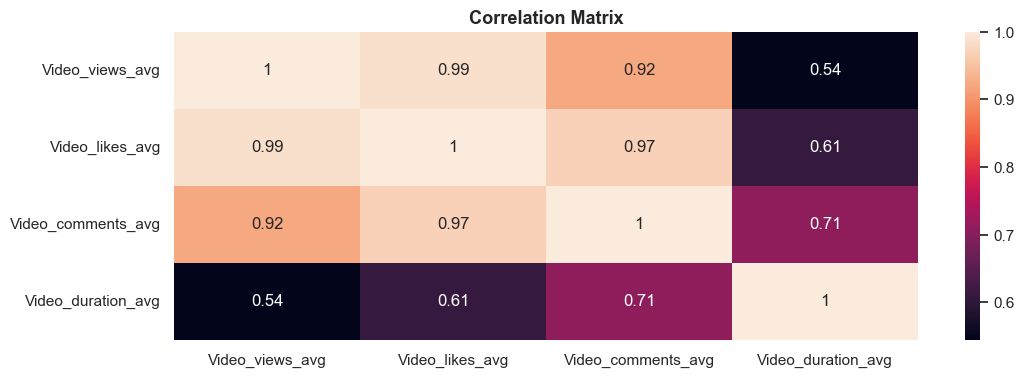

In [39]:
# Generating a correlation matrix
ax = sns.heatmap(df_videos_avg[['Video_views_avg', 
                                'Video_likes_avg', 
                                'Video_comments_avg', 
                                'Video_duration_avg']].corr(), annot= True)
ax.set_title('Correlation Matrix', weight = 'semibold').set_fontsize('13')


All variables are positively correlated, with __likes__ and __views__ haiving the highest correlation.

---

Having observed the correlations above, let's find out the percentage of __views__ that resulted in __likes__

In [40]:
# Calculating the Likes to Views ratio
df_videos_stats['Likes_to_views'] = round((df_videos_stats['Video_likes'] / (df_videos_stats['Video_views'])) * 100, 2) # Views are multiplied by 1000 here because it had been divided by this same number in the beginning of the analysis (for simplicity) 
df_videos_stats['Likes_to_views'] = df_videos_stats['Likes_to_views'].astype(float) # being specific about its data type
df_videos_stats[['Channel_name', 'Video_title', 'Likes_to_views']].head() # Getting some data to spot check it


,Channel_name,Video_title,Likes_to_views
0,Curbal,More Dynamic formatting AWESOMENESS!! | Annota...,4.90
1,Curbal,Show numbers in Thousands or Millions in same ...,2.84
2,Curbal,"Bite Solution 16: Add, edit and delete record...",2.99
3,Curbal,"Bite 16: Add, edit and delete records on SQLit...",2.48
4,Curbal,Bite Solution 15: Dynamic query a SQL database...,1.32


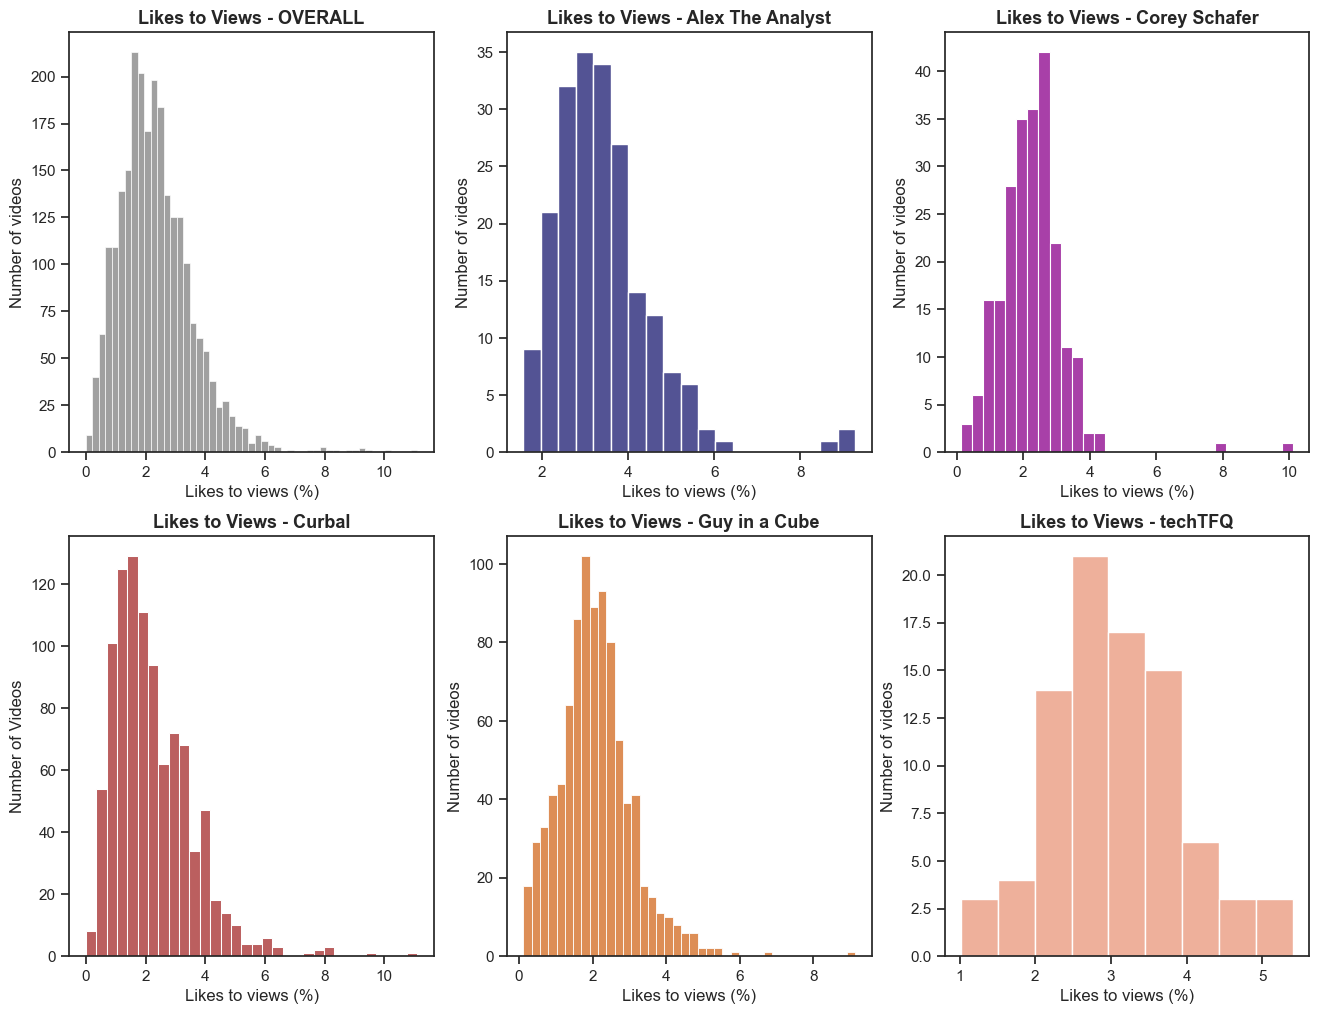

In [42]:
# Visualising the Likes to Views ratio: overall and at the level of each channel
sns.set(style="ticks")

fig, axs = plt.subplots(2, 3, figsize = (16, 12))

overall = sns.histplot(data = df_videos_stats, x = 'Likes_to_views', color = "grey", ax = axs[0, 0])
overall.set_title('Likes to Views - OVERALL', weight = 'semibold').set_fontsize('13')
overall.set_xlabel('Likes to views (%)')
overall.set_ylabel('Number of videos')

alex_the_analyst = sns.histplot(data = df_videos_stats[df_videos_stats['Channel_name'] == 'Alex The Analyst'], x = 'Likes_to_views', color = 'midnightblue', ax=axs[0, 1])
alex_the_analyst.set_title('Likes to Views - Alex The Analyst', weight = 'semibold').set_fontsize('13')
alex_the_analyst.set_xlabel('Likes to views (%)')
alex_the_analyst.set_ylabel('Number of videos')

corey_schafer = sns.histplot(data = df_videos_stats[df_videos_stats['Channel_name']== 'Corey Schafer'], x = 'Likes_to_views', color = 'darkmagenta', ax=axs[0, 2])
corey_schafer.set_title('Likes to Views - Corey Schafer', weight = 'semibold').set_fontsize('13')
corey_schafer.set_xlabel('Likes to views (%)')
corey_schafer.set_ylabel('Number of videos')

curbal = sns.histplot(data = df_videos_stats[df_videos_stats['Channel_name']== 'Curbal'], x = 'Likes_to_views', color = 'brown', ax=axs[1, 0])
curbal.set_title('Likes to Views - Curbal', weight = 'semibold').set_fontsize('13')
curbal.set_xlabel('Likes to views (%)')
curbal.set_ylabel('Number of Videos')

guy_in_a_cube = sns.histplot(data = df_videos_stats[df_videos_stats['Channel_name']== 'Guy in a Cube'], x = 'Likes_to_views', color = 'chocolate', ax=axs[1, 1])
guy_in_a_cube.set_title('Likes to Views - Guy in a Cube', weight = 'semibold').set_fontsize('13')
guy_in_a_cube.set_xlabel('Likes to views (%)')
guy_in_a_cube.set_ylabel('Number of videos')

techTFQ = sns.histplot(data = df_videos_stats[df_videos_stats['Channel_name']== 'techTFQ'], x = 'Likes_to_views',  color = 'darksalmon', ax=axs[1, 2])
techTFQ.set_title('Likes to Views - techTFQ', weight = 'semibold').set_fontsize('13')
techTFQ.set_xlabel('Likes to views (%)')
techTFQ.set_ylabel('Number of videos')

plt.show()


---

Reference:
- https://www.youtube.com/watch?v=SwSbnmqk3zY